In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
f = open("WhatsApp Chat with Taekwondo Friends.txt","r",encoding="utf-8")

In [3]:
data = f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[APap][Mm]\s?-\s'



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ayush Tomar\AppData\Local\Temp\ipykernel_2016\572822150.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = '\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[APap][Mm]\s?-\s'


In [6]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 'Akram Ali created group "Taekwondo Unofficial🥋"\n',
 'Akram Ali added you\n',
 'Akram Ali removed ~\u202fRohit Gupta\n',
 'Akanksha: Guys sab  koi thode thode apne \n\n\nabhi ideas share Kar sakte hoo <This message was edited>\n',
 'Akanksha: Koi reference  ki ye bhi ham add on Kar sakte hae\n',
 '+91 95987 21674: RP sir ka pahle ka photo ka pata karo\n',
 "Anuj Thakur: 🔴🔴\n *Tomorrow is R P Sir's birthday, it is mandatory for everyone to come tomorrow..*\n",
 'Akram Ali added Anshuman Mishra\n',
 'Akram Ali: Guys anagh sir ki call aai thi sab log LT 11 me ajao bula rahe hai\n',
 'Akram Ali: AC bhi laga hua hai\n',
 'Ayush Tomar: Nahay dhoye nhi kya ab\n',
 'Akram Ali: Naha ke aao jaldi se\n',
 'Akram Ali: Agar ni aana hoga toh phir se call karke bol dege woh\n',
 'Ayush Tomar: Kab tak aana hai\n',
 'Ayush Tomar: ?\n',
 'Akram Ali: Rehne do compulsory ni hai\n',

In [7]:
dates = re.findall(pattern,data)
dates

['9/30/23, 8:00\u202fPM - ',
 '5/21/23, 12:41\u202fPM - ',
 '9/30/23, 7:49\u202fPM - ',
 '9/30/23, 8:21\u202fPM - ',
 '10/1/23, 2:15\u202fPM - ',
 '10/1/23, 2:16\u202fPM - ',
 '10/1/23, 3:23\u202fPM - ',
 '10/1/23, 10:54\u202fPM - ',
 '10/2/23, 10:04\u202fAM - ',
 '10/2/23, 10:45\u202fAM - ',
 '10/2/23, 10:45\u202fAM - ',
 '10/2/23, 10:47\u202fAM - ',
 '10/2/23, 10:48\u202fAM - ',
 '10/2/23, 10:48\u202fAM - ',
 '10/2/23, 10:48\u202fAM - ',
 '10/2/23, 10:48\u202fAM - ',
 '10/2/23, 10:49\u202fAM - ',
 '10/2/23, 10:49\u202fAM - ',
 '10/2/23, 10:50\u202fAM - ',
 '10/2/23, 2:29\u202fPM - ',
 '10/2/23, 8:17\u202fPM - ',
 '10/2/23, 9:15\u202fPM - ',
 '10/3/23, 10:05\u202fAM - ',
 '10/3/23, 10:31\u202fAM - ',
 '10/3/23, 10:45\u202fAM - ',
 '10/3/23, 10:51\u202fAM - ',
 '10/3/23, 10:52\u202fAM - ',
 '10/3/23, 10:53\u202fAM - ',
 '10/3/23, 10:53\u202fAM - ',
 '10/3/23, 10:53\u202fAM - ',
 '10/3/23, 10:42\u202fPM - ',
 '10/7/23, 4:45\u202fPM - ',
 '10/8/23, 7:36\u202fPM - ',
 '10/18/23, 6:17\u202

In [8]:
df = pd.DataFrame({"user_message":messages, "message_date": dates})

# clean \u202df

df["message_date"] = df["message_date"].str.replace('\u202f',' ',regex=True)

# convert message_date type

df["message_date"] = pd.to_datetime(df["message_date"], format="%m/%d/%y, %I:%M %p - ", errors="coerce" )

df.rename(columns={"message_date": "date"}, inplace = True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2023-09-30 20:00:00
1,"Akram Ali created group ""Taekwondo Unofficial🥋""\n",2023-05-21 12:41:00
2,Akram Ali added you\n,2023-09-30 19:49:00
3,Akram Ali removed ~ Rohit Gupta\n,2023-09-30 20:21:00
4,Akanksha: Guys sab koi thode thode apne \n\n\...,2023-10-01 14:15:00


In [9]:
df.shape

(1586, 2)

In [10]:
users = []
messages_clean = []

for message in df["user_message"]:
    entry = re.split(r'([^:]+): (.+)', message)
    if len(entry) >= 3:
        users.append(entry[1].strip())
        messages_clean.append(entry[2].strip())
    else:
        users.append("group_notification")
        messages_clean.append(message.strip())

df["user"] = users
df["message"] = messages_clean
df.drop(columns=["user_message"], inplace=True)

df.head()

,date,user,message
0,2023-09-30 20:00:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2023-05-21 12:41:00,group_notification,"Akram Ali created group ""Taekwondo Unofficial🥋"""
2,2023-09-30 19:49:00,group_notification,Akram Ali added you
3,2023-09-30 20:21:00,group_notification,Akram Ali removed ~ Rohit Gupta
4,2023-10-01 14:15:00,Akanksha,Guys sab koi thode thode apne


In [11]:
df["year"] = df["date"].dt.year

In [12]:
df.head()

,date,user,message,year
0,2023-09-30 20:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023
1,2023-05-21 12:41:00,group_notification,"Akram Ali created group ""Taekwondo Unofficial🥋""",2023
2,2023-09-30 19:49:00,group_notification,Akram Ali added you,2023
3,2023-09-30 20:21:00,group_notification,Akram Ali removed ~ Rohit Gupta,2023
4,2023-10-01 14:15:00,Akanksha,Guys sab koi thode thode apne,2023


In [13]:
df["month"] = df["date"].dt.month_name()

In [14]:
df["day"] = df["date"].dt.day

In [15]:
df["hour"] = df["date"].dt.hour

In [16]:
df["minute"] = df["date"].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-09-30 20:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,September,30,20,0
1,2023-05-21 12:41:00,group_notification,"Akram Ali created group ""Taekwondo Unofficial🥋""",2023,May,21,12,41
2,2023-09-30 19:49:00,group_notification,Akram Ali added you,2023,September,30,19,49
3,2023-09-30 20:21:00,group_notification,Akram Ali removed ~ Rohit Gupta,2023,September,30,20,21
4,2023-10-01 14:15:00,Akanksha,Guys sab koi thode thode apne,2023,October,1,14,15


In [18]:
words = []
for message in df["message"]:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'Only', 'people', 'in', 'this', 'chat', 'can', 'read,', 'listen', 'to,', 'or', 'share', 'them.', 'Learn', 'more.']
['Akram', 'Ali', 'created', 'group', '"Taekwondo', 'Unofficial🥋"']
['Akram', 'Ali', 'added', 'you']
['Akram', 'Ali', 'removed', '~', 'Rohit', 'Gupta']
['Guys', 'sab', 'koi', 'thode', 'thode', 'apne']
['Koi', 'reference', 'ki', 'ye', 'bhi', 'ham', 'add', 'on', 'Kar', 'sakte', 'hae']
['RP', 'sir', 'ka', 'pahle', 'ka', 'photo', 'ka', 'pata', 'karo']
['🔴🔴']
['Akram', 'Ali', 'added', 'Anshuman', 'Mishra']
['Guys', 'anagh', 'sir', 'ki', 'call', 'aai', 'thi', 'sab', 'log', 'LT', '11', 'me', 'ajao', 'bula', 'rahe', 'hai']
['AC', 'bhi', 'laga', 'hua', 'hai']
['Nahay', 'dhoye', 'nhi', 'kya', 'ab']
['Naha', 'ke', 'aao', 'jaldi', 'se']
['Agar', 'ni', 'aana', 'hoga', 'toh', 'phir', 'se', 'call', 'karke', 'bol', 'dege', 'woh']
['Kab', 'tak', 'aana', 'hai']
['?']
['Rehne', 'do', 'compulsory', 'ni', 'hai']
['Agar', 'AC', 'ki'

In [19]:
len(words)

0

In [20]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("lets www.gmail.com have URL stackoverflow.com as an example google.com, http://facebook.com, fttp://url.in")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'fttp://url.in']

In [21]:
links = []
for message in df["message"]:
  links.extend(extractor.find_urls(message))

In [22]:
links

['https://photos.app.goo.gl/QpN6p3aBc9QvUF766',
 'https://photos.app.goo.gl/9wzN1JZjutBVDUxA9',
 'https://drive.google.com/drive/folders/1O3TG0HRk5Ehf_hTbKS1qrPpasnlTljNE',
 'https://photos.app.goo.gl/vDTaf4zNWZHWnjE87',
 'https://photos.app.goo.gl/HTBuFuVMNb8AcU719',
 'https://photos.app.goo.gl/kv45E7QdXdj4FYfU6',
 'https://www.instagram.com/reel/C9udJRWvuey/?igsh=MTl1eGllYTNjNDM5YQ==',
 'https://chat.whatsapp.com/I3DmG7yykg7F9IPRg6qEE7',
 'https://photos.app.goo.gl/9WNXKPuTX5GtAwgy8',
 'https://youtube.com/shorts/oBbnINBWUoY?feature=shared',
 'https://www.instagram.com/reel/DDCdT7myawO/?igsh=YzAyMDM1MGJkZA==',
 'https://docs.google.com/forms/d/e/1FAIpQLScWKDQpngm2iYGvi7tlDWl-bFPGMBDDwPboVCrHKFJycX61Vg/viewform?usp=dialog',
 'https://chat.whatsapp.com/JEnALuodpEr2fFZ4atKFTg']

In [23]:
len(links)

13

In [24]:
df

,date,user,message,year,month,day,hour,minute
0,2023-09-30 20:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,September,30,20,0
1,2023-05-21 12:41:00,group_notification,"Akram Ali created group ""Taekwondo Unofficial🥋""",2023,May,21,12,41
2,2023-09-30 19:49:00,group_notification,Akram Ali added you,2023,September,30,19,49
3,2023-09-30 20:21:00,group_notification,Akram Ali removed ~ Rohit Gupta,2023,September,30,20,21
4,2023-10-01 14:15:00,Akanksha,Guys sab koi thode thode apne,2023,October,1,14,15
...,...,...,...,...,...,...,...,...
1581,2025-05-30 18:46:00,Akanksha,Ok,2025,May,30,18,46
1582,2025-05-30 18:48:00,Anuj Thakur,Unka kuchh din pehle unka birthday tha n,2025,May,30,18,48
1583,2025-06-04 23:28:00,+91 63063 99596,Ye bto Card kiske pas hai,2025,June,4,23,28
1584,2025-06-16 21:24:00,Anuj Thakur,Follow this link to join my WhatsApp group: ht...,2025,June,16,21,24


In [25]:
x= df["user"].value_counts().head()

In [26]:
name = x.index
count = x.values

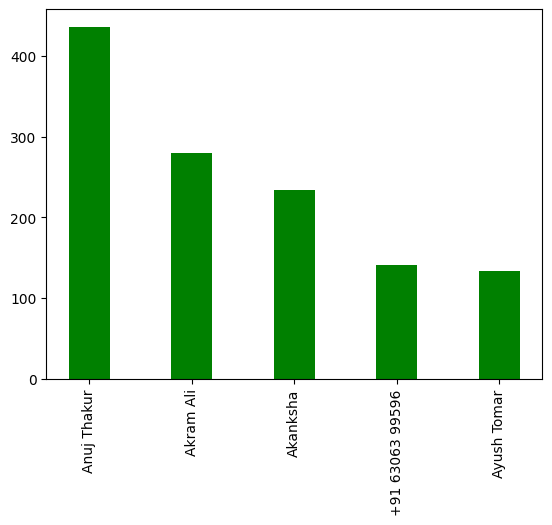

In [27]:
plt.bar(name,count,width = 0.4, color = "g")
plt.xticks(rotation="vertical")
plt.show()

In [28]:
round((df["user"].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"user":"name","count":"percent"})

,name,percent
0,Anuj Thakur,27.49
1,Akram Ali,17.65
2,Akanksha,14.75
3,+91 63063 99596,8.89
4,Ayush Tomar,8.45
5,Gopal,5.99
6,+91 95558 19581,3.22
7,+91 93352 81309,2.90
8,+91 91406 56061,2.65
9,group_notification,1.77


In [29]:
temp = df[df["user"] != "group_notification"]
temp = temp[temp["message"] != "<Media omitted>"]

In [30]:
f = open("stop_hinglish.txt","r")
stop_words = f.read()


In [31]:
words = []

for message in temp["message"]:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)



In [32]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,86
1,birthday,57
2,happy,53
3,deleted,43
4,ground,43
5,year,43
6,juniors,39
7,hae,37
8,seniors,35
9,group,34


In [33]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [34]:
import emoji

In [35]:
emojis = []
for message in df["message"]:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [36]:
# Count the emojis
emoji_counts = Counter(emojis)

# Get most common as a list of tuples
most_common_emojis = emoji_counts.most_common()

# Convert to DataFrame
emoji_df = pd.DataFrame(most_common_emojis, columns=['emoji', 'count'])

emoji_df.head()


,emoji,count
0,🥳,46
1,🎉,43
2,🔴,40
3,😂,40
4,🎂,31


<BarContainer object of 5 artists>

C:\Users\Ayush Tomar\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Ayush Tomar\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Ayush Tomar\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Ayush Tomar\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Ayush Tomar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from f

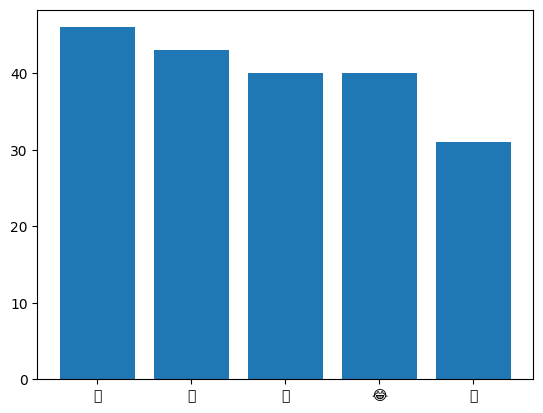

In [37]:
plt.bar(emoji_df["emoji"].head(),emoji_df["count"].head())


In [38]:
df["month_num"] = df["date"].dt.month

In [39]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2023-09-30 20:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,September,30,20,0,9
1,2023-05-21 12:41:00,group_notification,"Akram Ali created group ""Taekwondo Unofficial🥋""",2023,May,21,12,41,5
2,2023-09-30 19:49:00,group_notification,Akram Ali added you,2023,September,30,19,49,9
3,2023-09-30 20:21:00,group_notification,Akram Ali removed ~ Rohit Gupta,2023,September,30,20,21,9
4,2023-10-01 14:15:00,Akanksha,Guys sab koi thode thode apne,2023,October,1,14,15,10
...,...,...,...,...,...,...,...,...,...
1581,2025-05-30 18:46:00,Akanksha,Ok,2025,May,30,18,46,5
1582,2025-05-30 18:48:00,Anuj Thakur,Unka kuchh din pehle unka birthday tha n,2025,May,30,18,48,5
1583,2025-06-04 23:28:00,+91 63063 99596,Ye bto Card kiske pas hai,2025,June,4,23,28,6
1584,2025-06-16 21:24:00,Anuj Thakur,Follow this link to join my WhatsApp group: ht...,2025,June,16,21,24,6


In [40]:
timeline = df.groupby(["year","month_num","month"]).count()["message"].reset_index()

In [41]:
timeline

,year,month_num,month,message
0,2023,5,May,1
1,2023,9,September,3
2,2023,10,October,127
3,2023,11,November,89
4,2023,12,December,56
5,2024,1,January,12
6,2024,2,February,13
7,2024,3,March,20
8,2024,4,April,146
9,2024,5,May,29


In [42]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline["month"][i] + "-" + str(timeline["year"][i]))

In [43]:
timeline["time"] = time

In [44]:
timeline

,year,month_num,month,message,time
0,2023,5,May,1,May-2023
1,2023,9,September,3,September-2023
2,2023,10,October,127,October-2023
3,2023,11,November,89,November-2023
4,2023,12,December,56,December-2023
5,2024,1,January,12,January-2024
6,2024,2,February,13,February-2024
7,2024,3,March,20,March-2024
8,2024,4,April,146,April-2024
9,2024,5,May,29,May-2024


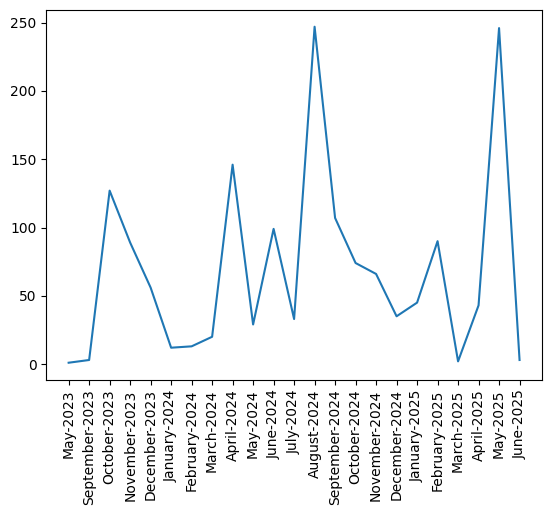

In [45]:
plt.plot(timeline["time"],timeline["message"])
plt.xticks(rotation= "vertical")
plt.show()

In [46]:
df["only_date"] = df["date"].dt.date

In [47]:
daily_timeline = df.groupby("only_date").count()["message"].reset_index()

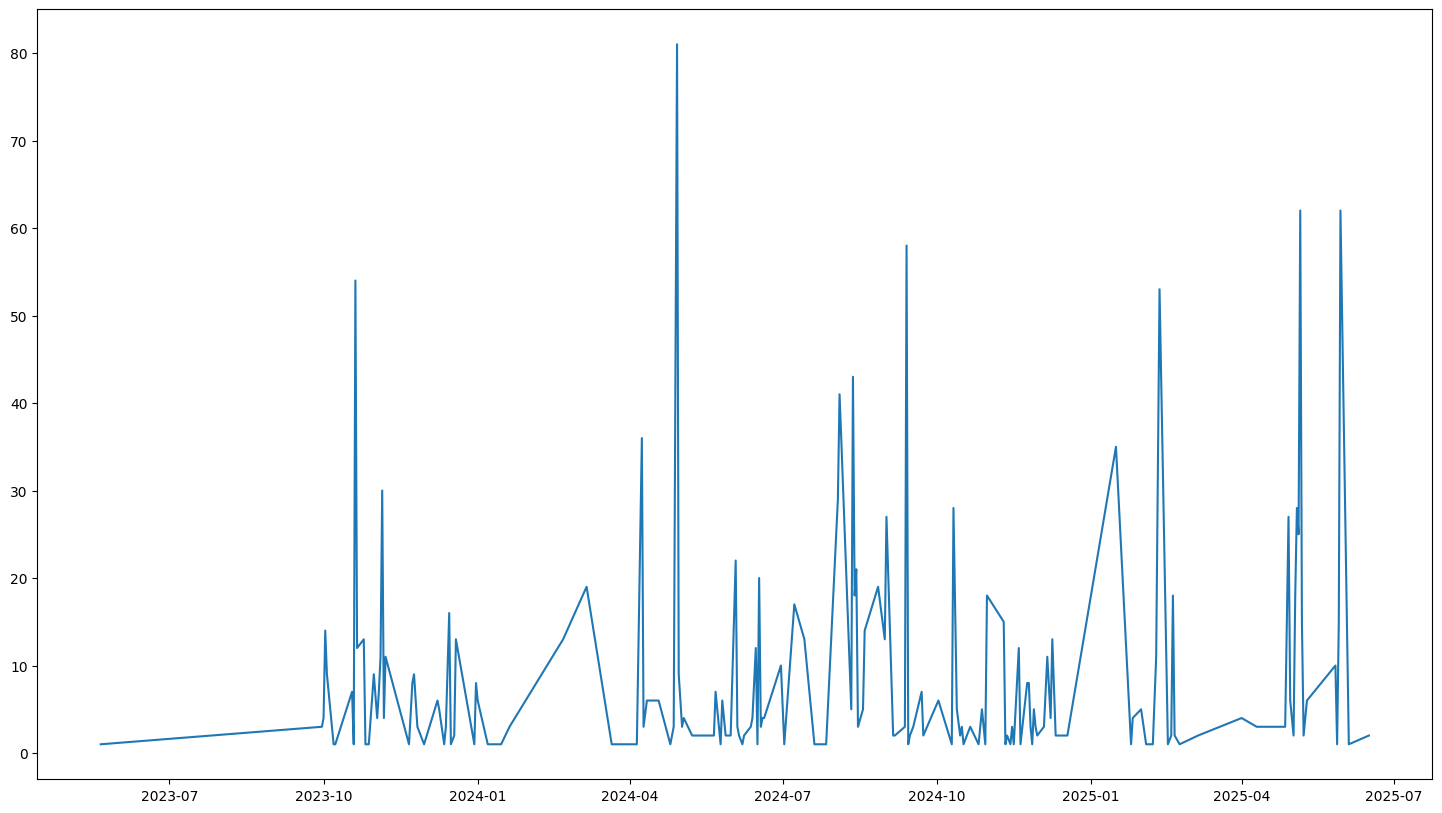

In [48]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline["only_date"],daily_timeline["message"])

In [49]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2023-09-30 20:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,September,30,20,0,9,2023-09-30
1,2023-05-21 12:41:00,group_notification,"Akram Ali created group ""Taekwondo Unofficial🥋""",2023,May,21,12,41,5,2023-05-21
2,2023-09-30 19:49:00,group_notification,Akram Ali added you,2023,September,30,19,49,9,2023-09-30
3,2023-09-30 20:21:00,group_notification,Akram Ali removed ~ Rohit Gupta,2023,September,30,20,21,9,2023-09-30
4,2023-10-01 14:15:00,Akanksha,Guys sab koi thode thode apne,2023,October,1,14,15,10,2023-10-01


In [50]:
df["day_name"] = df["date"].dt.day_name()


In [51]:
df["day_name"].value_counts()

day_name
Monday       356
Tuesday      284
Friday       283
Sunday       245
Wednesday    154
Thursday     134
Saturday     130
Name: count, dtype: int64

In [52]:
df["month"].value_counts()

month
May          276
August       247
October      201
April        189
November     155
September    110
February     103
June         102
December      91
January       57
July          33
March         22
Name: count, dtype: int64

In [53]:
period = []

for hour in df[["day_name","hour"]]["hour"]:
    if hour == 23:
        period.append(str(hour) + "-" + str("00"))

    elif hour == 0:
        period.append(str("00") + "-" + str(hour+1))

    else:
        period.append(str(hour)+ "-" + str(hour+1))

In [54]:
df["period"] = period

In [55]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
1117,2024-11-29 12:12:00,Akanksha,2nd half Mai kon available hae?,2024,November,29,12,12,11,2024-11-29,Friday,12-13
1141,2024-12-09 01:42:00,+91 95558 19581,Mai bhi nhi,2024,December,9,1,42,12,2024-12-09,Monday,1-2
1101,2024-11-25 07:46:00,Anuj Thakur,Aaj koi gya bhi h ya nhi ?,2024,November,25,7,46,11,2024-11-25,Monday,7-8
295,2024-02-21 20:05:00,Anuj Thakur,<Media omitted>,2024,February,21,20,5,2,2024-02-21,Wednesday,20-21
152,2023-11-04 20:24:00,+91 95558 19581,Sambhal ke chalenge,2023,November,4,20,24,11,2023-11-04,Saturday,20-21


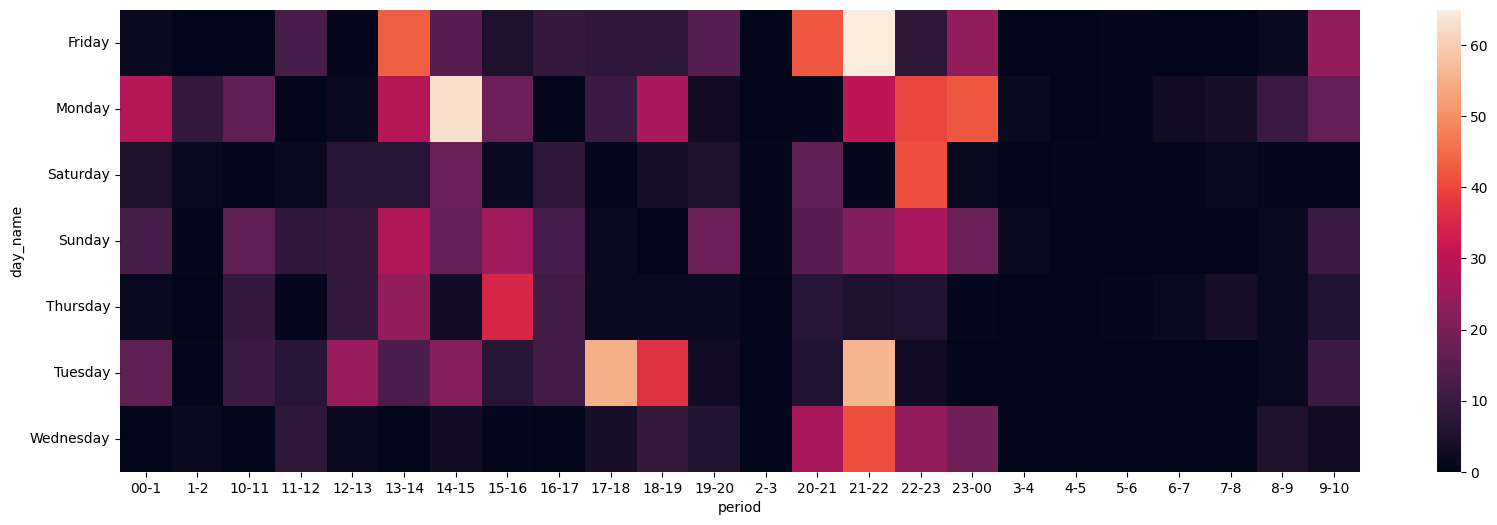

In [56]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index="day_name", columns="period", values="message",aggfunc="count").fillna(0))
plt.yticks(rotation="horizontal")
plt.show()